### Uber Rideshare - Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans

from scipy.stats import pearsonr

import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_rows = None
pd.options.display.max_columns = None

df = pd.read_csv('rideshare_kaggle.csv')
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [2]:
print(df.columns)
print("------------------------------------------------------")
print(df.dtypes)
print("------------------------------------------------------")
print(df.shape)

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperat

In [3]:
# Taking subset of data

df = df.head(1000)

In [4]:
def detail_info(data):
    temp_df = pd.DataFrame(index= data.columns)
    
    temp_df['data_type'] = data.dtypes
    temp_df['unique_val'] = data.nunique()
    temp_df['duplicate_val'] = data.duplicated().sum()
    temp_df['missing_val'] = data.isnull().sum()
    temp_df['missing_val_%'] = round(data.isnull().mean()*100,2)
    
    return temp_df

detail_info(df)

,data_type,unique_val,duplicate_val,missing_val,missing_val_%
id,object,1000,0,0,0.0
timestamp,float64,1000,0,0,0.0
hour,int64,24,0,0,0.0
day,int64,17,0,0,0.0
month,int64,2,0,0,0.0
datetime,object,968,0,0,0.0
timezone,object,1,0,0,0.0
source,object,12,0,0,0.0
destination,object,12,0,0,0.0
cab_type,object,2,0,0,0.0


In [5]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

detail_info(df)

,data_type,unique_val,duplicate_val,missing_val,missing_val_%
id,object,919,0,0,0.0
timestamp,float64,919,0,0,0.0
hour,int64,24,0,0,0.0
day,int64,17,0,0,0.0
month,int64,2,0,0,0.0
datetime,object,893,0,0,0.0
timezone,object,1,0,0,0.0
source,object,12,0,0,0.0
destination,object,12,0,0,0.0
cab_type,object,2,0,0,0.0


<AxesSubplot:>

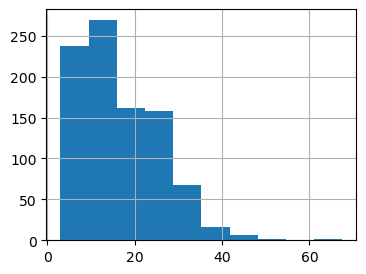

In [6]:
# output feature
plt.figure(figsize=(4,3))
df.price.hist()

In [7]:
df.columns

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperat

In [8]:
# Dropping irrelevant features
df=df.drop(['id', 'timestamp', 'hour', 'day', 'month', 'timezone','product_id', 'long_summary','apparentTemperatureHighTime',
            'apparentTemperatureLowTime','apparentTemperatureLowTime','windGustTime','sunriseTime','sunsetTime','uvIndex',
            'uvIndexTime','ozone','temperatureMinTime','temperatureMaxTime','apparentTemperatureMinTime','temperatureLowTime',
            'apparentTemperatureMaxTime', 'icon'], axis=1)

df.shape

(919, 35)

In [9]:
# Lets check corelation between numeric Temp related features and weather related features with output feature
temp_cols= ['temperature','apparentTemperature','temperatureHigh','temperatureLow','apparentTemperatureHigh', 
            'apparentTemperatureLow','temperatureMin','temperatureHighTime','temperatureMax','apparentTemperatureMin',
            'apparentTemperatureMax','precipIntensity', 'precipProbability', 'humidity', 'windSpeed', 'windGust', 'visibility',  
            'dewPoint', 'pressure','windBearing', 'cloudCover', 'visibility.1', 'moonPhase', 
            'precipIntensityMax']


In [10]:
from scipy.stats import pearsonr

def validate_correlation(df, col_list):   

    for col in col_list:
        correlation, p_value = pearsonr(df[col], df['price'])

        # Check if the p-value is above the significance level
        if p_value > 0.05:
            # Drop the feature from the DataFrame
            print(f"Dropping {col} as p-value {p_value:.3f} is greater than significance level")        
            df.drop(col, axis=1, inplace=True)
        else:
            print(f"{col} has p-value {p_value:.3f} is less than significance level")      

    return df

In [11]:
validate_correlation(df, temp_cols)
df.head()

Dropping temperature as p-value 0.102 is greater than significance level
Dropping apparentTemperature as p-value 0.101 is greater than significance level
Dropping temperatureHigh as p-value 0.144 is greater than significance level
Dropping temperatureLow as p-value 0.340 is greater than significance level
Dropping apparentTemperatureHigh as p-value 0.125 is greater than significance level
Dropping apparentTemperatureLow as p-value 0.140 is greater than significance level
Dropping temperatureMin as p-value 0.202 is greater than significance level
Dropping temperatureHighTime as p-value 0.090 is greater than significance level
Dropping temperatureMax as p-value 0.206 is greater than significance level
Dropping apparentTemperatureMin as p-value 0.099 is greater than significance level
Dropping apparentTemperatureMax as p-value 0.199 is greater than significance level
Dropping precipIntensity as p-value 0.233 is greater than significance level
Dropping precipProbability as p-value 0.222 is

,datetime,source,destination,cab_type,name,price,distance,surge_multiplier,latitude,longitude,short_summary
0,2018-12-16 09:30:07,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,1.0,42.2148,-71.033,Mostly Cloudy
1,2018-11-27 02:00:23,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,1.0,42.2148,-71.033,Rain
2,2018-11-28 01:00:22,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,Clear
3,2018-11-30 04:53:02,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,Clear
4,2018-11-29 03:49:20,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,Partly Cloudy


In [12]:
df.head()

,datetime,source,destination,cab_type,name,price,distance,surge_multiplier,latitude,longitude,short_summary
0,2018-12-16 09:30:07,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,1.0,42.2148,-71.033,Mostly Cloudy
1,2018-11-27 02:00:23,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,1.0,42.2148,-71.033,Rain
2,2018-11-28 01:00:22,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,Clear
3,2018-11-30 04:53:02,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,Clear
4,2018-11-29 03:49:20,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,Partly Cloudy


In [13]:
cat_features = ['source','destination','cab_type','name','surge_multiplier','short_summary']
cat_features

['source',
 'destination',
 'cab_type',
 'name',
 'surge_multiplier',
 'short_summary']

In [14]:
for feature in df[cat_features]:
    if feature == 'datetime':
        pass
    else:
        print(f"Feature:  {feature} \n")
        print(df[feature].value_counts())
        print("----------------------------------------------")

Feature:  source 

North End                  103
North Station               99
South Station               95
Haymarket Square            88
Theatre District            84
Boston University           80
Back Bay                    71
Beacon Hill                 70
West End                    66
Financial District          61
Fenway                      55
Northeastern University     47
Name: source, dtype: int64
----------------------------------------------
Feature:  destination 

North Station              102
Beacon Hill                101
North End                   98
Fenway                      90
South Station               78
West End                    76
Northeastern University     71
Theatre District            68
Financial District          66
Haymarket Square            60
Back Bay                    55
Boston University           54
Name: destination, dtype: int64
----------------------------------------------
Feature:  cab_type 

Uber    477
Lyft    442
Name: cab_type,

In [15]:
# Checking if source and destination have same features

if set(df.source) == set(df.destination):
    print("Source and destinations have same places.")    
else:
    print("Not same feature")

Source and destinations have same places.


In [16]:
# We can drop "cab_type" feature as name feature will take care the category:

df.groupby(["cab_type","name"]).name.agg(["count"]).reset_index()

,cab_type,name,count
0,Lyft,Lux,76
1,Lyft,Lux Black,74
2,Lyft,Lux Black XL,74
3,Lyft,Lyft,72
4,Lyft,Lyft XL,74
5,Lyft,Shared,72
6,Uber,Black,79
7,Uber,Black SUV,80
8,Uber,UberPool,77
9,Uber,UberX,80


In [17]:
df.drop(["cab_type"], axis=1, inplace=True)
df.head()

,datetime,source,destination,name,price,distance,surge_multiplier,latitude,longitude,short_summary
0,2018-12-16 09:30:07,Haymarket Square,North Station,Shared,5.0,0.44,1.0,42.2148,-71.033,Mostly Cloudy
1,2018-11-27 02:00:23,Haymarket Square,North Station,Lux,11.0,0.44,1.0,42.2148,-71.033,Rain
2,2018-11-28 01:00:22,Haymarket Square,North Station,Lyft,7.0,0.44,1.0,42.2148,-71.033,Clear
3,2018-11-30 04:53:02,Haymarket Square,North Station,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,Clear
4,2018-11-29 03:49:20,Haymarket Square,North Station,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,Partly Cloudy


<AxesSubplot:>

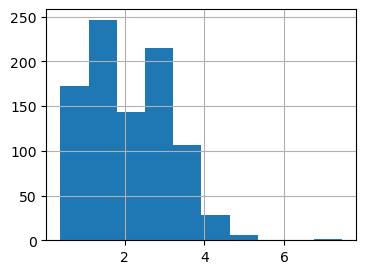

In [18]:
# Lets walk through rest of the features
plt.figure(figsize=(4,3))
df.distance.hist()

## Feature engineering:

In [19]:
# Lets find the day is weekday or weekend:

df['weekday_status'] = pd.to_datetime(df['datetime']).dt.day_name()
df['weekday_status'] = df['weekday_status'].apply(lambda x: 0 if x == "Saturday" or x == "Sunday" else 1)
df.head()

,datetime,source,destination,name,price,distance,surge_multiplier,latitude,longitude,short_summary,weekday_status
0,2018-12-16 09:30:07,Haymarket Square,North Station,Shared,5.0,0.44,1.0,42.2148,-71.033,Mostly Cloudy,0
1,2018-11-27 02:00:23,Haymarket Square,North Station,Lux,11.0,0.44,1.0,42.2148,-71.033,Rain,1
2,2018-11-28 01:00:22,Haymarket Square,North Station,Lyft,7.0,0.44,1.0,42.2148,-71.033,Clear,1
3,2018-11-30 04:53:02,Haymarket Square,North Station,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,Clear,1
4,2018-11-29 03:49:20,Haymarket Square,North Station,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,Partly Cloudy,1


In [20]:
# Lets find the time is peak_hours or not:

df['booking_time'] = pd.to_datetime(df['datetime']).dt.strftime('%H:%M:%S')

df['peak_hrs_status'] = df['booking_time'].apply(lambda x: 'Peak_hours' if (x>='07:00:00' and x<='10:00:00') or
                                                (x >= '16:30:00' and x <= '19:30:00')
                                                else 'Non_Peak')

df.drop(['datetime','booking_time'], axis=1, inplace=True)
df.head()

,source,destination,name,price,distance,surge_multiplier,latitude,longitude,short_summary,weekday_status,peak_hrs_status
0,Haymarket Square,North Station,Shared,5.0,0.44,1.0,42.2148,-71.033,Mostly Cloudy,0,Peak_hours
1,Haymarket Square,North Station,Lux,11.0,0.44,1.0,42.2148,-71.033,Rain,1,Non_Peak
2,Haymarket Square,North Station,Lyft,7.0,0.44,1.0,42.2148,-71.033,Clear,1,Non_Peak
3,Haymarket Square,North Station,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,Clear,1,Non_Peak
4,Haymarket Square,North Station,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,Partly Cloudy,1,Non_Peak


In [21]:
# Encoding the output feature

def feature_encoding(df, col):
    temp_list = list(sorted(df[col].unique()))
    return dict(zip(temp_list, range(len(temp_list))))  

In [22]:
# Features listed below are the categorical features and require encoding to be done:

cat_features = ['source', 'destination', 'name', 'surge_multiplier', 'short_summary', 'peak_hrs_status']

In [23]:
transformed_dict = {} 

for feature in df[cat_features]:
    feature_dict = feature_encoding(df, feature)
    transformed_dict[feature] = feature_dict

    df[feature] = df[feature].map(feature_dict)

transformed_dict
df.head()

,source,destination,name,price,distance,surge_multiplier,latitude,longitude,short_summary,weekday_status,peak_hrs_status
0,5,7,7,5.0,0.44,0,42.2148,-71.033,4,0,1
1,5,7,2,11.0,0.44,0,42.2148,-71.033,8,1,0
2,5,7,5,7.0,0.44,0,42.2148,-71.033,0,1,0
3,5,7,4,26.0,0.44,0,42.2148,-71.033,0,1,0
4,5,7,6,9.0,0.44,0,42.2148,-71.033,6,1,0


In [24]:
from sklearn.cluster import KMeans

# Relevant features for clustering
features = ['latitude', 'longitude', 'weekday_status', 'peak_hrs_status']  
X = df[features]

kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)

cluster_labels = kmeans.labels_
df["clusters"] = cluster_labels
df.head()

,source,destination,name,price,distance,surge_multiplier,latitude,longitude,short_summary,weekday_status,peak_hrs_status,clusters
0,5,7,7,5.0,0.44,0,42.2148,-71.033,4,0,1,3
1,5,7,2,11.0,0.44,0,42.2148,-71.033,8,1,0,4
2,5,7,5,7.0,0.44,0,42.2148,-71.033,0,1,0,4
3,5,7,4,26.0,0.44,0,42.2148,-71.033,0,1,0,4
4,5,7,6,9.0,0.44,0,42.2148,-71.033,6,1,0,4


In [25]:
# Since we have distance feature with us then no need of latitude and longitude features

df.drop(['latitude','longitude', 'clusters'], axis=1, inplace=True)
df.head()

,source,destination,name,price,distance,surge_multiplier,short_summary,weekday_status,peak_hrs_status
0,5,7,7,5.0,0.44,0,4,0,1
1,5,7,2,11.0,0.44,0,8,1,0
2,5,7,5,7.0,0.44,0,0,1,0
3,5,7,4,26.0,0.44,0,0,1,0
4,5,7,6,9.0,0.44,0,6,1,0


In [26]:
df = df.reindex(columns=['source','destination','name','distance','surge_multiplier','short_summary','weekday_status',
                        'peak_hrs_status','price'])
df.head()

,source,destination,name,distance,surge_multiplier,short_summary,weekday_status,peak_hrs_status,price
0,5,7,7,0.44,0,4,0,1,5.0
1,5,7,2,0.44,0,8,1,0,11.0
2,5,7,5,0.44,0,0,1,0,7.0
3,5,7,4,0.44,0,0,1,0,26.0
4,5,7,6,0.44,0,6,1,0,9.0


In [27]:
from sklearn.model_selection import GridSearchCV

X = df.drop(['price'], axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5]
}

model = RandomForestRegressor()
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', rmse)

r2 = r2_score(y_test, y_pred)
print('R2_score:', r2)

Root Mean Squared Error: 2.403549012730412
R2_score: 0.9333876441202532


In [28]:
import folium

# Create a map centered around the first coordinate
map = folium.Map(location=[42.3647, -71.0542], zoom_start=15)

coordinates = [[42.3647, -71.0542], [42.3647, -71.054231], [42.3647, -71.0542],
               [42.3647, -71.0542], [42.3647, -71.05420], [42.3647, -71.0542]]

for coord in coordinates:
    folium.Marker(location=coord).add_to(map)

map